In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [106]:
bike_data = pd.read_csv("/home/shahidshaikh/Downloads/day.csv")

In [107]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [108]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [109]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [110]:
bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [111]:
bike_data.drop_duplicates(inplace=True)

In [112]:
bike_data.shape

(730, 16)

### Dropping columns

In [113]:
bike_data = bike_data.drop(['instant','dteday','casual','registered'],axis=1)

In [114]:
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Converting some numeric into categorical value

In [115]:
bike_data.season = bike_data.season.map({1: 'spring',2: 'summer', 3: 'fall', 4: 'winter'})

In [116]:
bike_data.mnth = bike_data.mnth.map({1: 'Jan',2: 'Feb', 3: 'March', 4: 'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11: 'Nov',12:'Dec'})

In [117]:
bike_data.weekday = bike_data.weekday.map({0: 'Mon',1: 'Tue', 2: 'Wed', 3: 'Thu',4:'Fri',5:'Sat',6:'Sun'})

In [119]:
bike_data.weathersit = bike_data.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [121]:
bike_data.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sun,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Mon,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Tue,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Wed,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Thu,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,Jan,0,Fri,1,Clear,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,Jan,0,Sat,1,Misty,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,Jan,0,Sun,0,Misty,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,Jan,0,Mon,0,Clear,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,Jan,0,Tue,1,Clear,6.184153,7.54440,48.2917,14.958889,1321


### Plotting a distplot 

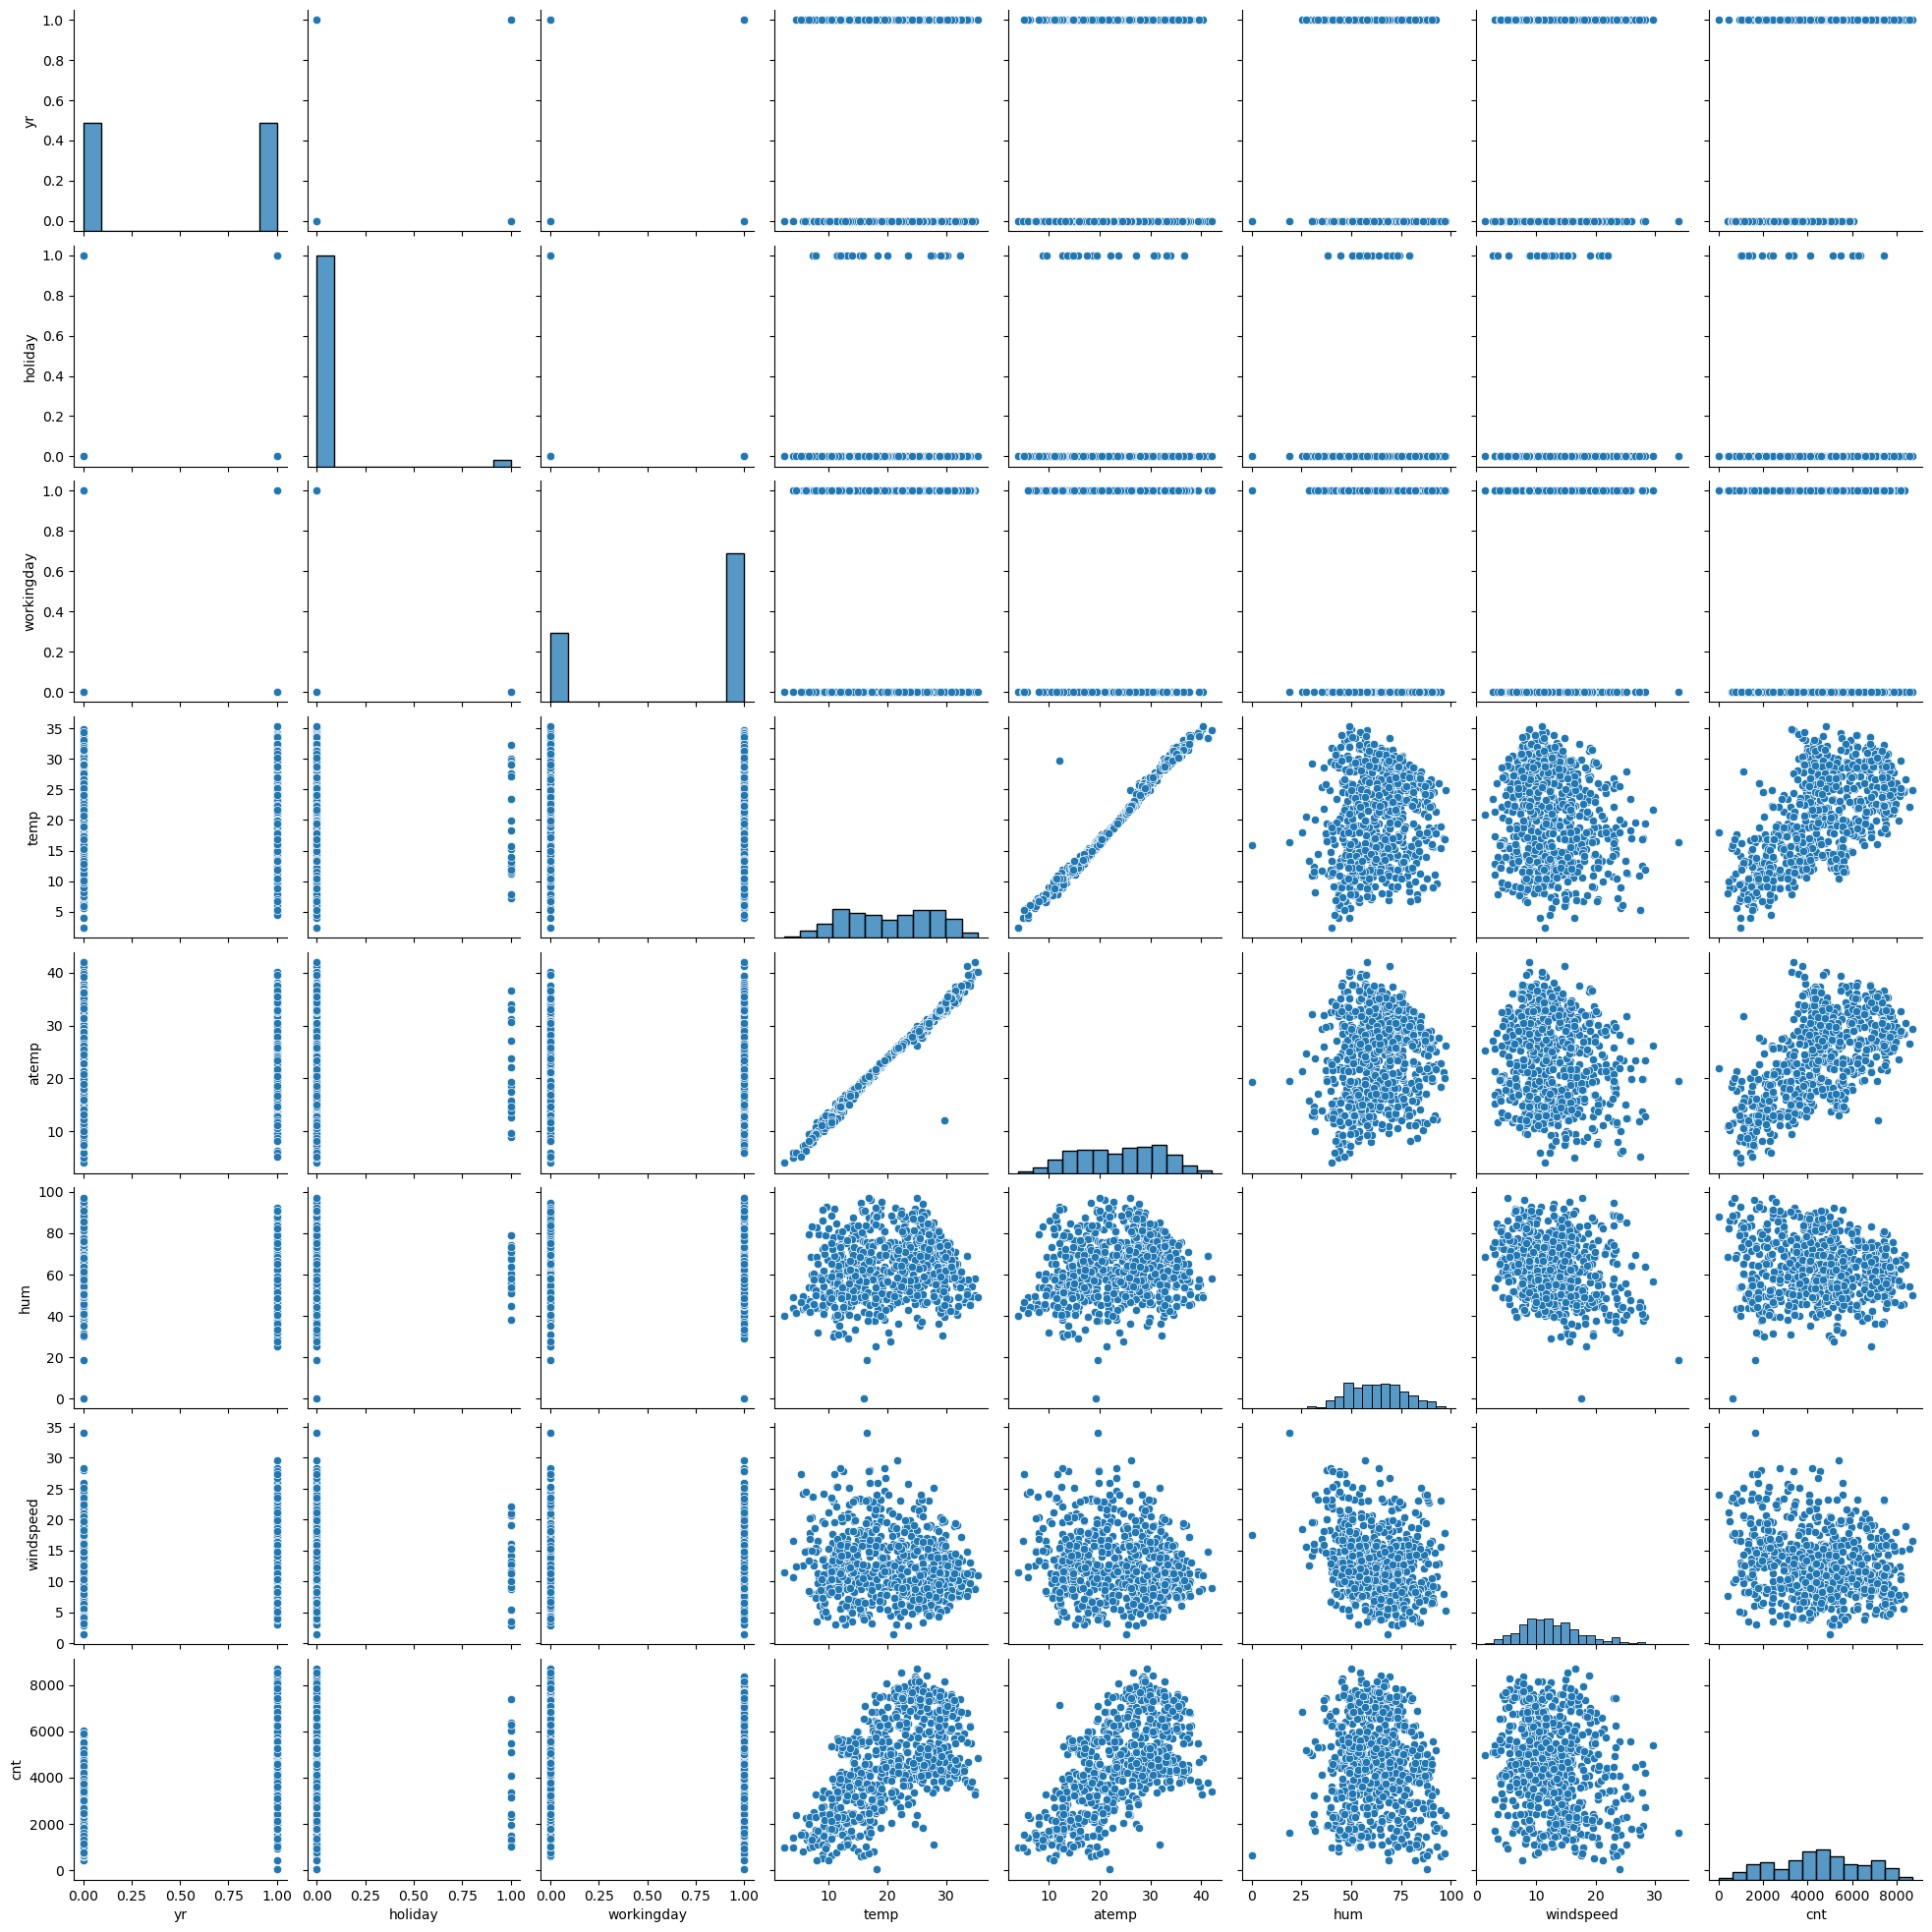

In [122]:
sns.pairplot(bike_data)
plt.show()

### Plotting boxplot with target variable as cnt

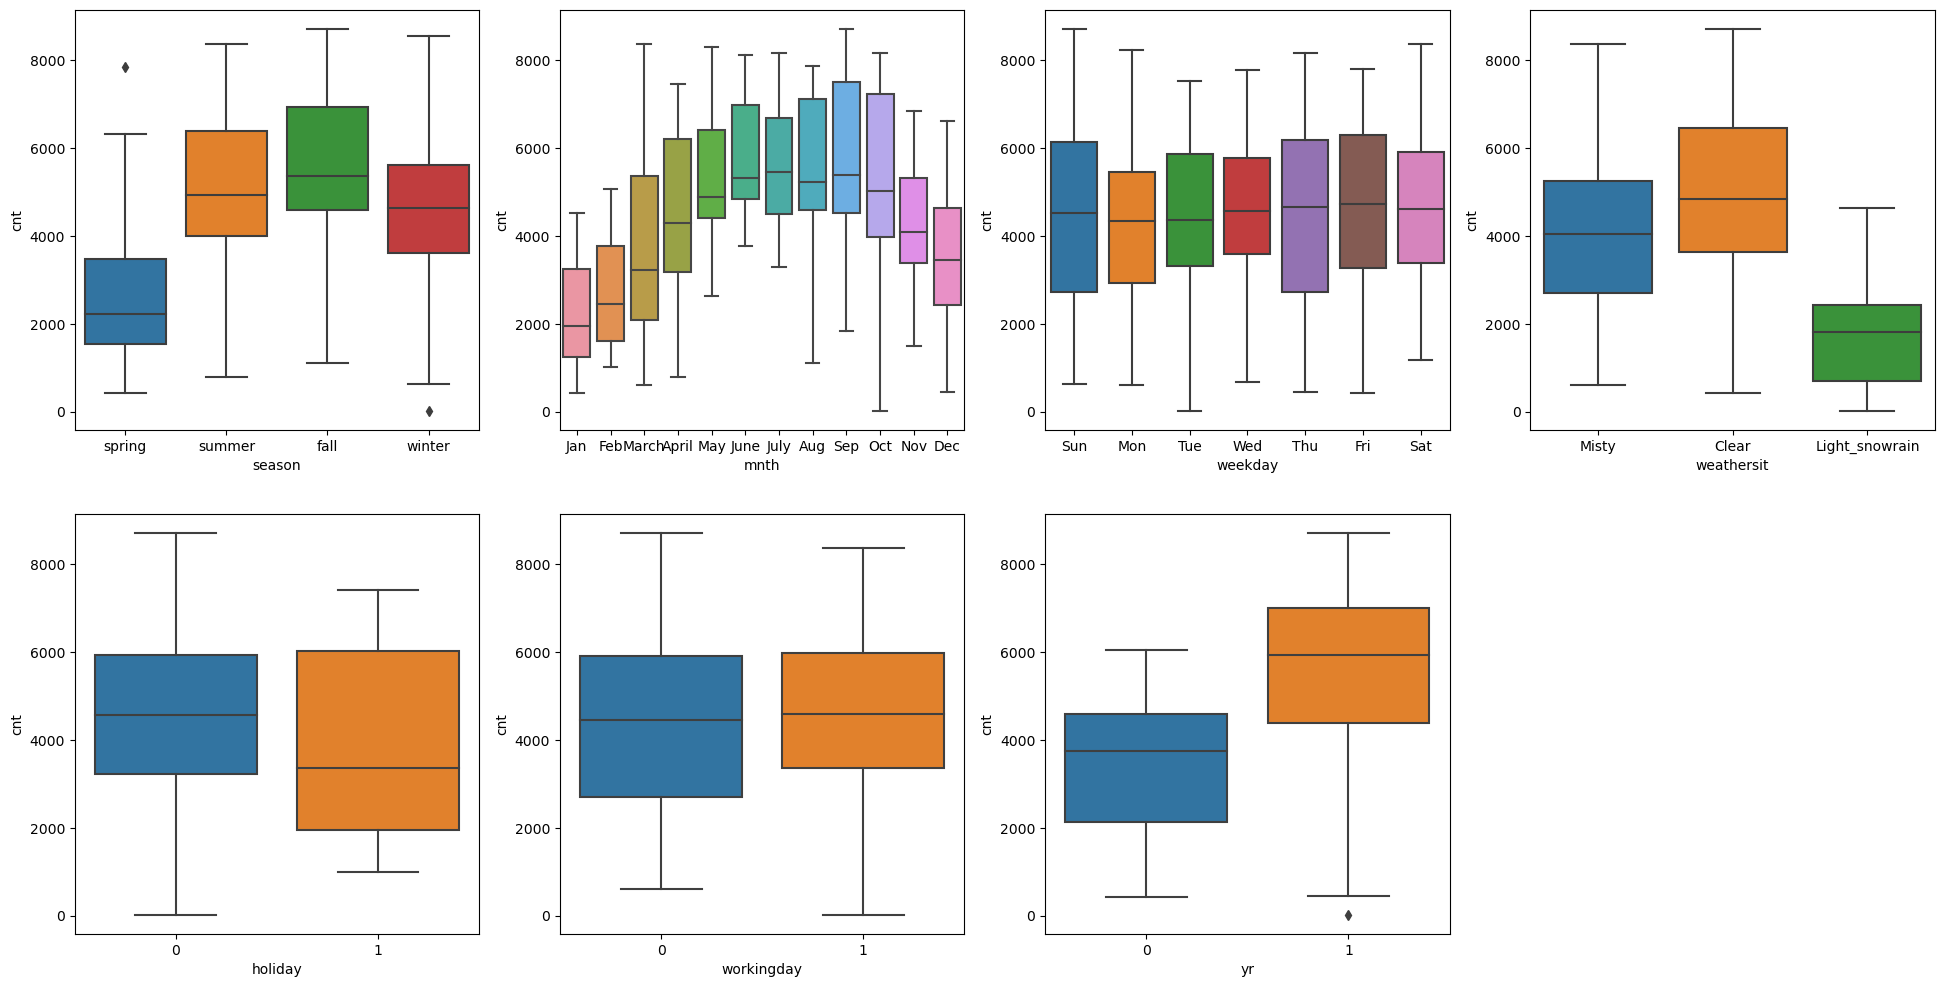

In [126]:
plt.figure(figsize=(24, 12))
plt.subplot(2,4,1)
sns.boxplot(x='season', y='cnt', data=bike_data)
plt.subplot(2,4,2)
sns.boxplot(x='mnth', y='cnt', data=bike_data)
plt.subplot(2,4,3)
sns.boxplot(x='weekday', y='cnt', data=bike_data)
plt.subplot(2,4,4)
sns.boxplot(x='weathersit', y='cnt', data=bike_data)
plt.subplot(2,4,5)
sns.boxplot(x='holiday', y='cnt', data=bike_data)
plt.subplot(2,4,6)
sns.boxplot(x='workingday', y='cnt', data=bike_data)
plt.subplot(2,4,7)
sns.boxplot(x='yr', y='cnt', data=bike_data)
plt.show()

### Create bar plots

In [140]:
def createBarPlots(col):
    plt.figure(figsize = (13,5))
    plt.subplot(1,2,1)
    sns.barplot(data=bike_data,x=col,y='cnt')
    plt.subplot(1,2,2)
    sns.barplot(data=bike_data,x=col,y='cnt', hue='yr')
    plt.legend(labels=['2018', '2019'])
    plt.show()

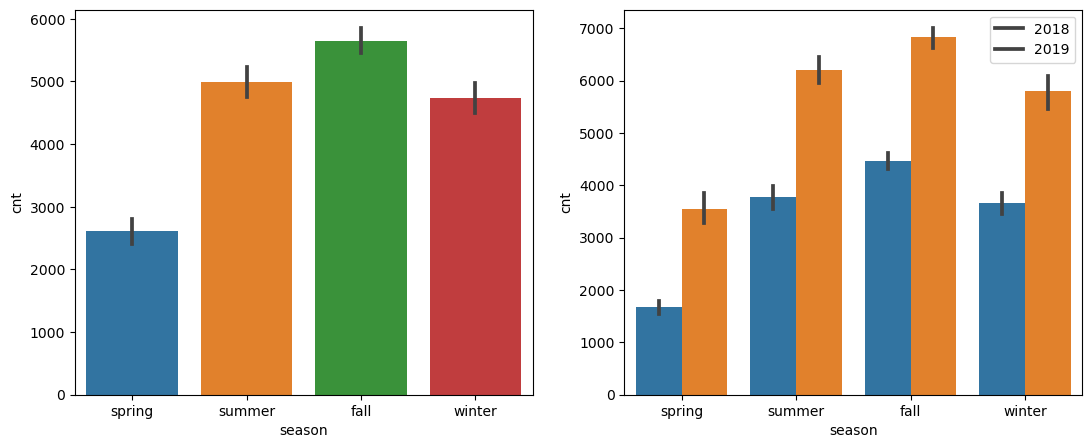

In [141]:
createBarPlots('season')

Summer and fall seems to be the season where customers are renting the bikes. There is a significant increase in 2019 compares to 2018.

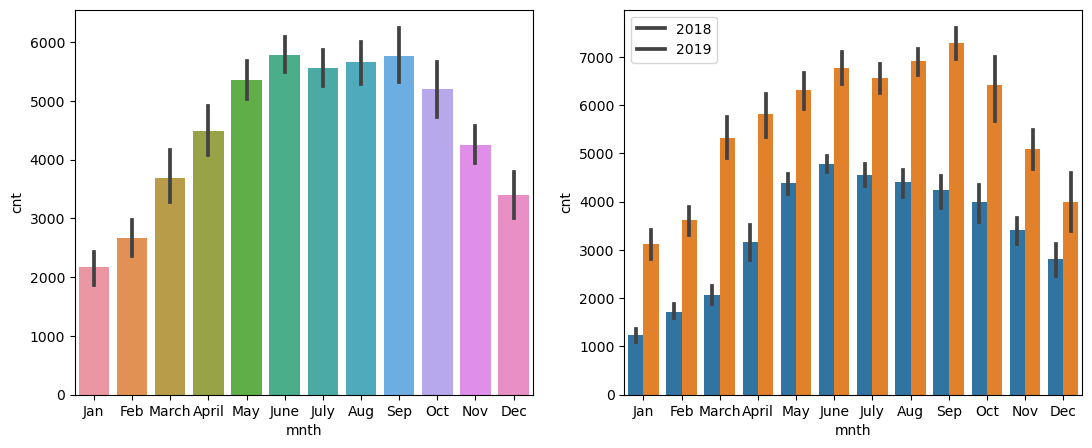

In [142]:
createBarPlots('mnth')

There is a significant growth of users from March month to June then slowly declining towards December month which indicates majority of the users are using the service during summer and fall and not much during winters.

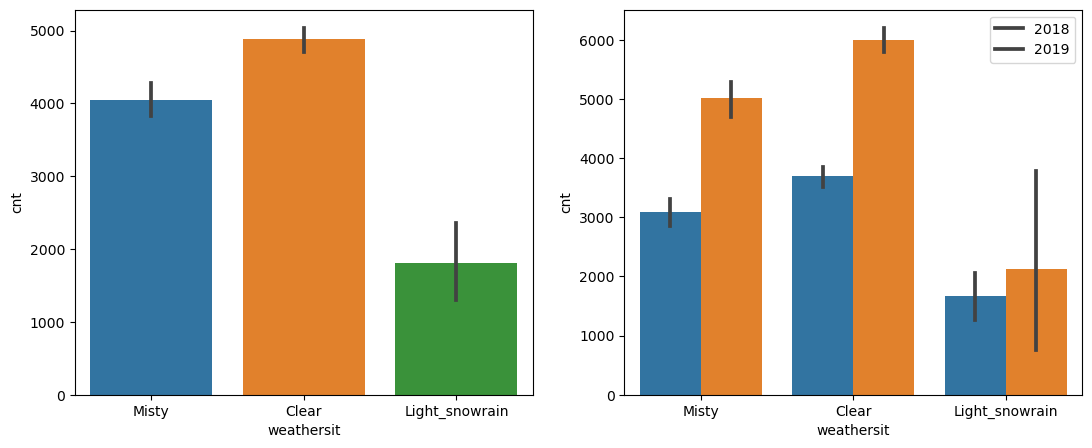

In [143]:
createBarPlots('weathersit')

During snow and rain customers are not using the service as much as the clear and misty weather which is obvious in the nature. No one likes to drive the bike during the rain.

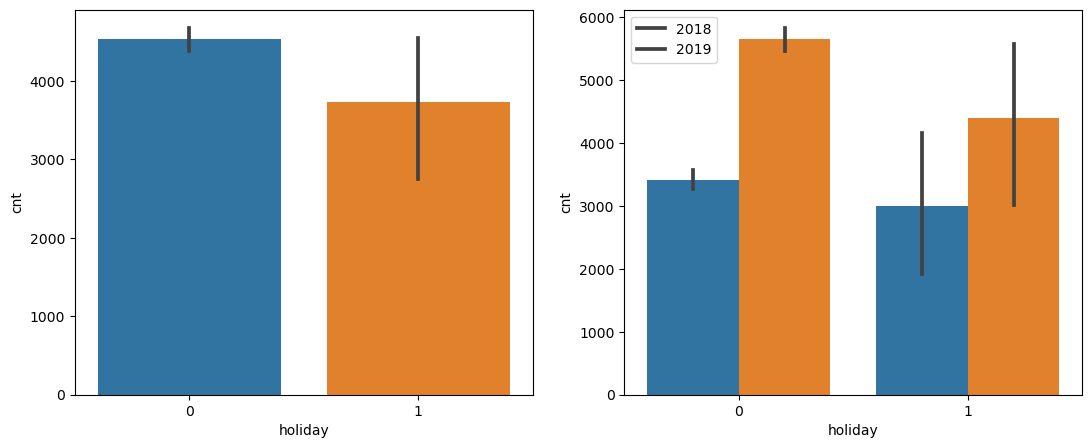

In [144]:
createBarPlots('holiday')

People are using the service during the non holiday seasons which makes sense as people wants to spend time at home during the holidays.

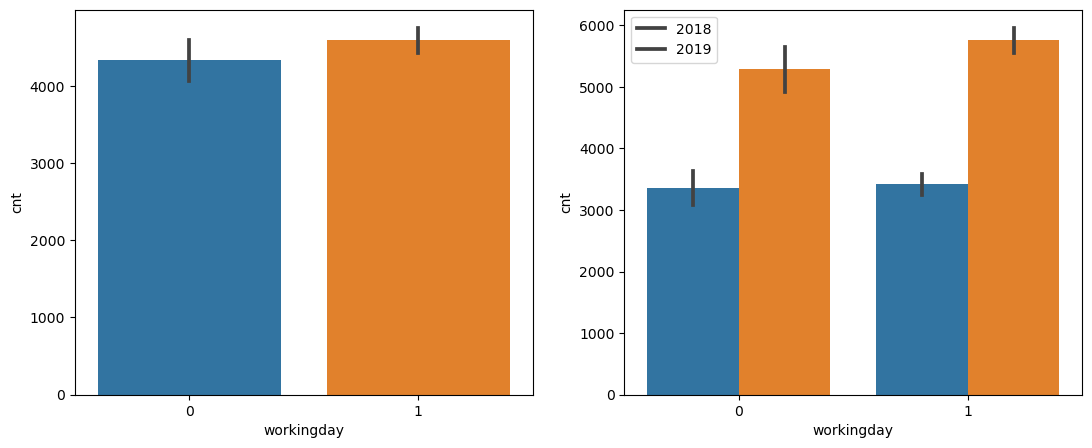

In [145]:
createBarPlots('workingday')

There is not much difference between working and non-working days.

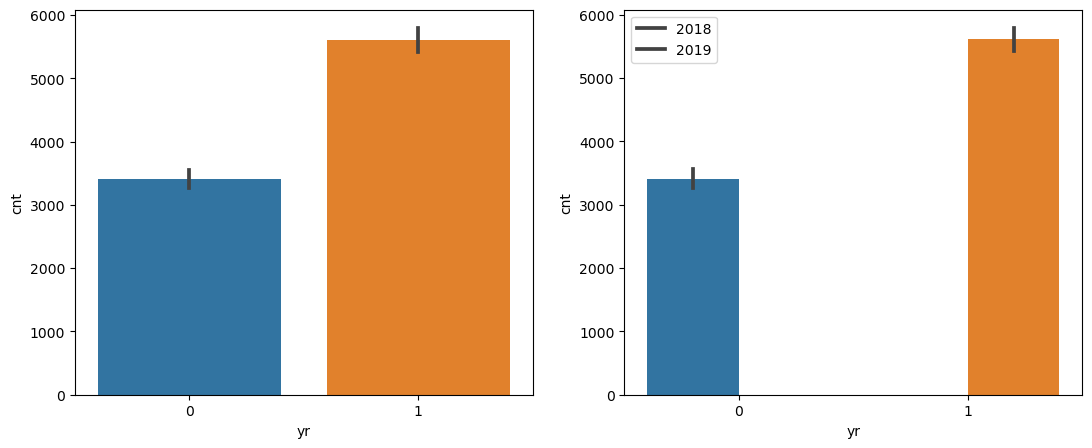

In [147]:
createBarPlots('yr')

There is a significant growth in the year 2019 compare to 2018.

### Creating dummy variables of categorical columns

In [149]:
seasonsDummy=pd.get_dummies(bike_data.season,drop_first=True)
monthsDummy=pd.get_dummies(bike_data.mnth,drop_first=True)
weekdaysDummy=pd.get_dummies(bike_data.weekday,drop_first=True)
weathersitDummy=pd.get_dummies(bike_data.weathersit,drop_first=True)

### Appending the dummy variables to the dataframe

In [150]:
bike_data_updated = pd.concat([bike_data,seasonsDummy,monthsDummy,weekdaysDummy,weathersitDummy],axis=1)

In [151]:
bike_data_updated.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_snowrain,Misty
0,spring,0,Jan,0,Sun,0,Misty,14.110847,18.18125,80.5833,...,0,0,0,0,1,0,0,0,0,1
1,spring,0,Jan,0,Mon,0,Misty,14.902598,17.68695,69.6087,...,0,0,1,0,0,0,0,0,0,1
2,spring,0,Jan,0,Tue,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,1,0,0,0
3,spring,0,Jan,0,Wed,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,1,0,0
4,spring,0,Jan,0,Thu,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,1,0,0,0,0


In [152]:
bike_data_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   yr              730 non-null    int64  
 2   mnth            730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   hum             730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  spring          730 non-null    uint8  
 13  summer          730 non-null    uint8  
 14  winter          730 non-null    uint8  
 15  Aug             730 non-null    uint8  
 16  Dec             730 non-null    uint8  
 17  Feb             730 non-null    uin

In [153]:
bike_data_updated.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [156]:
bike_data_updated.shape

(730, 30)

In [155]:
bike_data_updated.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_snowrain,Misty
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,1,0,0,0,0


### Splitting the data

In [157]:
df_train, df_test = train_test_split(bike_data_updated, train_size=0.7, random_state=100)

In [158]:
df_train.shape

(510, 30)

### Scaling numeric values

In [159]:
numeric_columns = ['temp', 'atemp', 'hum', 'windspeed','cnt']

In [160]:
scaler = MinMaxScaler()
df_train[numeric_columns] = scaler.fit_transform(df_train[numeric_columns])

In [161]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_snowrain,Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.143137,0.127451,0.154902,0.158824,0.150980,0.131373,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.350557,0.333805,0.362166,0.365870,0.358381,0.338139,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


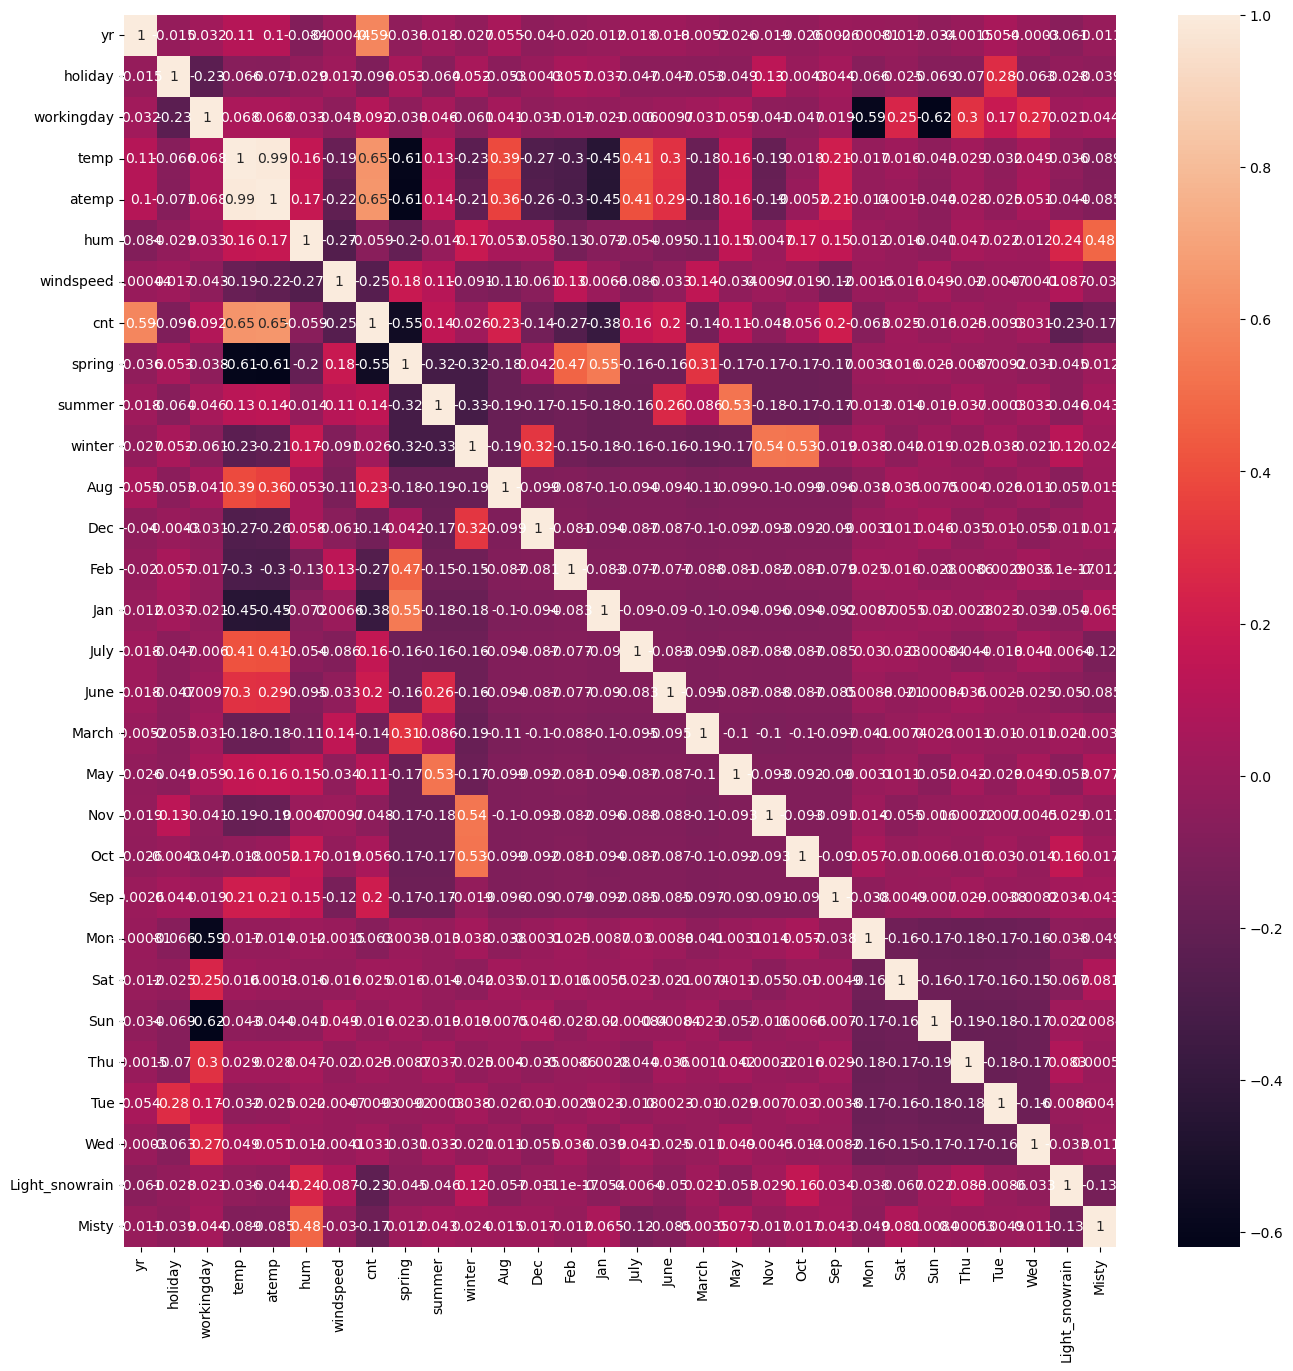

In [162]:
plt.figure(figsize=(16,16))
sns.heatmap(df_train.corr(),annot=True)
plt.show()

In [163]:
y_train = df_train.pop("cnt")
X_train = df_train

### Building a recursive model first

In [165]:
lm = LinearRegression()

In [166]:
lm.fit(X_train,y_train)

LinearRegression()

In [171]:
rfe = RFE(lm, n_features_to_select=15)

In [172]:
rfe = rfe.fit(X_train,y_train)

In [173]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 13),
 ('March', False, 15),
 ('May', False, 6),
 ('Nov', False, 2),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', False, 11),
 ('Sun', True, 1),
 ('Thu', False, 14),
 ('Tue', False, 9),
 ('Wed', False, 10),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1)]

In [174]:
positive_col = X_train.columns[rfe.support_]
positive_col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Jan', 'July', 'Sep', 'Sun', 'Light_snowrain',
       'Misty'],
      dtype='object')

In [175]:
rejected_col = X_train.columns[~rfe.support_]
rejected_col

Index(['atemp', 'Aug', 'Dec', 'Feb', 'June', 'March', 'May', 'Nov', 'Oct',
       'Mon', 'Sat', 'Thu', 'Tue', 'Wed'],
      dtype='object')

In [176]:
X_train_rfe = X_train[positive_col]


In [178]:
# calculate VIF
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [179]:
calculateVIF(X_train_rfe)

,Features,VIF
4,hum,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
6,spring,4.53
8,winter,3.46
7,summer,2.85
14,Misty,2.29
0,yr,2.09
12,Sun,1.98


Humidity shows high VIF value and holiday shows low VIF value. After REF, let's build linear regression model by adding all columns and removing them one by one to get an optimal model

### Building a linear model - Adding a constant

In [180]:
X_train_sm = sm.add_constant(X_train_rfe)

In [181]:
lr = sm.OLS(y_train,X_train_sm)

In [184]:
lr_model = lr.fit()

In [185]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Mon, 07 Aug 2023   Prob (F-statistic):          4.22e-191
Time:                        16:30:46   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2519      0.036      6.969      0.000       0.181       0.323
yr                 0.2305      0.008     28.795      0.000       0.215       0.246
holiday           -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday         0.0433      0.012      3.762      0.000       0.021       0.066
temp               0.5096      0.034     14.837      0.000       0.442       0.577
hum               -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed         -0.1863      0.025     -7.310      0.000      -0.236      -0.136
spring            -0.0509      0.021     -2.464      0.014      -0.091      -0.010
summer             0.0508      0.015      3.423      0.001       0.022       0.080
winter             0.0933      0.017      5.403      0.000       0.059       0.127
Jan               -0.0345      0.017     -1.989      0.047      -0.069      -0.000
July              -0.0529      0.018     -2.931      0.004      -0.088      -0.017
Sep                0.0814      0.016      4.945      0.000       0.049       0.114
Sun                0.0536      0.014      3.694      0.000       0.025       0.082
Light_snowrain    -0.2475      0.026     -9.507      0.000      -0.299      -0.196
Misty             -0.0563      0.010     -5.439      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Let's drop humidty as it has high VIF value and build the model again.

In [186]:
X_train_new = X_train_rfe.drop(['hum'],axis=1)

In [187]:
calculateVIF(X_train_new)

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.68
5,spring,3.07
6,summer,2.34
0,yr,2.08
7,winter,1.98
11,Sun,1.97
8,Jan,1.62
9,July,1.59


### Building second iteraiton of model

In [188]:
X_train_sm_1 = sm.add_constant(X_train_new)

In [189]:
lr = sm.OLS(y_train,X_train_sm_1)

In [190]:
lr_model = lr.fit()

In [191]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Mon, 07 Aug 2023   Prob (F-statistic):          1.60e-188
Time:                        16:36:35   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1737      0.031      5.520      0.000       0.112       0.235
yr                 0.2345      0.008     29.009      0.000       0.219       0.250
holiday           -0.0558      0.027     -2.042      0.042      -0.109      -0.002
workingday         0.0464      0.012      3.966      0.000       0.023       0.069
temp               0.4722      0.034     14.005      0.000       0.406       0.538
windspeed         -0.1563      0.025     -6.286      0.000      -0.205      -0.107
spring            -0.0599      0.021     -2.867      0.004      -0.101      -0.019
summer             0.0445      0.015      2.967      0.003       0.015       0.074
winter             0.0784      0.017      4.562      0.000       0.045       0.112
Jan               -0.0392      0.018     -2.227      0.026      -0.074      -0.005
July              -0.0479      0.018     -2.614      0.009      -0.084      -0.012
Sep                0.0755      0.017      4.527      0.000       0.043       0.108
Sun                0.0583      0.015      3.968      0.000       0.029       0.087
Light_snowrain    -0.2908      0.024    -11.977      0.000      -0.339      -0.243
Misty             -0.0813      0.009     -9.437      0.000      -0.098      -0.064
==============================================================================
Omnibus:                       67.830   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.565
Skew:                          -0.692   Prob(JB):                     1.84e-36
Kurtosis:                       5.415   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Dropping temp as it's high VIF and low P value.

In [194]:
X_train_new_2 = X_train_new.drop(['temp'],axis=1)

In [195]:
calculateVIF(X_train_new_2)

,Features,VIF
3,windspeed,4.27
2,workingday,3.83
4,spring,2.97
5,summer,2.29
6,winter,1.98
0,yr,1.91
10,Sun,1.69
7,Jan,1.60
12,Misty,1.57
8,July,1.30


### Building a third linear model

In [196]:
X_train_sm_2 = sm.add_constant(X_train_new_2)

In [197]:
lr = sm.OLS(y_train,X_train_sm_2)

In [198]:
lr_model = lr.fit()

In [199]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     135.7
Date:                Mon, 07 Aug 2023   Prob (F-statistic):          6.44e-154
Time:                        16:53:39   Log-Likelihood:                 425.63
No. Observations:                 510   AIC:                            -823.3
Df Residuals:                     496   BIC:                            -764.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5444      0.020     27.118      0.000       0.505       0.584
yr                 0.2478      0.009     26.153      0.000       0.229       0.266
holiday           -0.0567      0.032     -1.757      0.080      -0.120       0.007
workingday         0.0478      0.014      3.466      0.001       0.021       0.075
windspeed         -0.1878      0.029     -6.426      0.000      -0.245      -0.130
spring            -0.2602      0.018    -14.483      0.000      -0.296      -0.225
summer            -0.0427      0.016     -2.651      0.008      -0.074      -0.011
winter            -0.0762      0.016     -4.903      0.000      -0.107      -0.046
Jan               -0.1026      0.020     -5.112      0.000      -0.142      -0.063
July              -0.0095      0.021     -0.446      0.656      -0.052       0.032
Sep                0.0710      0.020      3.610      0.000       0.032       0.110
Sun                0.0562      0.017      3.243      0.001       0.022       0.090
Light_snowrain    -0.3034      0.029    -10.593      0.000      -0.360      -0.247
Misty             -0.0882      0.010     -8.688      0.000      -0.108      -0.068
==============================================================================
Omnibus:                       34.639   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.598
Skew:                          -0.421   Prob(JB):                     3.46e-15
Kurtosis:                       4.557   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

P value of July is high, let's drop and re-build the model

In [201]:
X_train_new_3 = X_train_new_2.drop(['July'],axis=1)

In [202]:
calculateVIF(X_train_new_3)

,Features,VIF
3,windspeed,4.12
2,workingday,3.54
4,spring,2.68
5,summer,2.01
0,yr,1.89
6,winter,1.78
9,Sun,1.62
7,Jan,1.60
11,Misty,1.57
8,Sep,1.20


### Building a fourth linear model.

In [203]:
X_train_sm_3 = sm.add_constant(X_train_new_3)

In [204]:
lr = sm.OLS(y_train,X_train_sm_3)

In [205]:
lr_model = lr.fit()

In [206]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     147.2
Date:                Mon, 07 Aug 2023   Prob (F-statistic):          5.73e-155
Time:                        17:05:56   Log-Likelihood:                 425.53
No. Observations:                 510   AIC:                            -825.1
Df Residuals:                     497   BIC:                            -770.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5406      0.018     29.655      0.000       0.505       0.576
yr                 0.2478      0.009     26.179      0.000       0.229       0.266
holiday           -0.0563      0.032     -1.746      0.081      -0.120       0.007
workingday         0.0481      0.014      3.489      0.001       0.021       0.075
windspeed         -0.1877      0.029     -6.429      0.000      -0.245      -0.130
spring            -0.2568      0.016    -15.797      0.000      -0.289      -0.225
summer            -0.0393      0.014     -2.768      0.006      -0.067      -0.011
winter            -0.0730      0.014     -5.303      0.000      -0.100      -0.046
Jan               -0.1027      0.020     -5.118      0.000      -0.142      -0.063
Sep                0.0737      0.019      3.933      0.000       0.037       0.111
Sun                0.0564      0.017      3.254      0.001       0.022       0.090
Light_snowrain    -0.3035      0.029    -10.606      0.000      -0.360      -0.247
Misty             -0.0879      0.010     -8.685      0.000      -0.108      -0.068
==============================================================================
Omnibus:                       34.767   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.525
Skew:                          -0.424   Prob(JB):                     3.58e-15
Kurtosis:                       4.553   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Dropping holiday as it's high P value and low P VIF.

In [207]:
X_train_new_4 = X_train_new_3.drop(['holiday'],axis=1)

In [209]:
calculateVIF(X_train_new_4)

,Features,VIF
2,windspeed,4.04
1,workingday,3.29
3,spring,2.65
4,summer,2.00
0,yr,1.88
5,winter,1.73
6,Jan,1.60
10,Misty,1.57
8,Sun,1.56
7,Sep,1.18


### Building a fifth linear model

In [210]:
X_train_sm_4 = sm.add_constant(X_train_new_4)

In [211]:
lr = sm.OLS(y_train,X_train_sm_4)

In [212]:
lr_model = lr.fit()

In [213]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     159.7
Date:                Mon, 07 Aug 2023   Prob (F-statistic):          2.01e-155
Time:                        17:09:13   Log-Likelihood:                 423.97
No. Observations:                 510   AIC:                            -823.9
Df Residuals:                     498   BIC:                            -773.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5332      0.018     30.023      0.000       0.498       0.568
yr                 0.2480      0.009     26.146      0.000       0.229       0.267
workingday         0.0564      0.013      4.353      0.000       0.031       0.082
windspeed         -0.1887      0.029     -6.450      0.000      -0.246      -0.131
spring            -0.2581      0.016    -15.860      0.000      -0.290      -0.226
summer            -0.0394      0.014     -2.768      0.006      -0.067      -0.011
winter            -0.0743      0.014     -5.392      0.000      -0.101      -0.047
Jan               -0.1033      0.020     -5.138      0.000      -0.143      -0.064
Sep                0.0715      0.019      3.815      0.000       0.035       0.108
Sun                0.0648      0.017      3.887      0.000       0.032       0.098
Light_snowrain    -0.3023      0.029    -10.546      0.000      -0.359      -0.246
Misty             -0.0874      0.010     -8.623      0.000      -0.107      -0.067
==============================================================================
Omnibus:                       39.401   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.660
Skew:                          -0.459   Prob(JB):                     5.04e-18
Kurtosis:                       4.705   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [215]:
lr_model.params

const             0.533171
yr                0.248004
workingday        0.056374
windspeed        -0.188695
spring           -0.258093
summer           -0.039401
winter           -0.074260
Jan              -0.103255
Sep               0.071471
Sun               0.064819
Light_snowrain   -0.302344
Misty            -0.087382
dtype: float64

In [216]:
X_train_sm_4

,const,yr,workingday,windspeed,spring,summer,winter,Jan,Sep,Sun,Light_snowrain,Misty
576,1.0,1,1,0.264686,0,0,0,0,0,0,0,0
426,1.0,1,0,0.255342,1,0,0,0,0,1,0,1
728,1.0,1,0,0.663106,1,0,0,0,0,0,0,0
482,1.0,1,0,0.188475,0,1,0,0,0,1,0,1
111,1.0,0,1,0.380981,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,1,0.187140,0,0,0,0,0,0,0,0
53,1.0,0,1,0.111379,1,0,0,0,0,0,0,0
350,1.0,0,0,0.431816,0,0,1,0,0,1,0,1
79,1.0,0,1,0.529881,0,1,0,0,0,0,0,1


In [217]:
y_train_pred = lr_model.predict(X_train_sm_4)

In [218]:
res = y_train - y_train_pred

/tmp/ipykernel_239682/1482882585.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res)


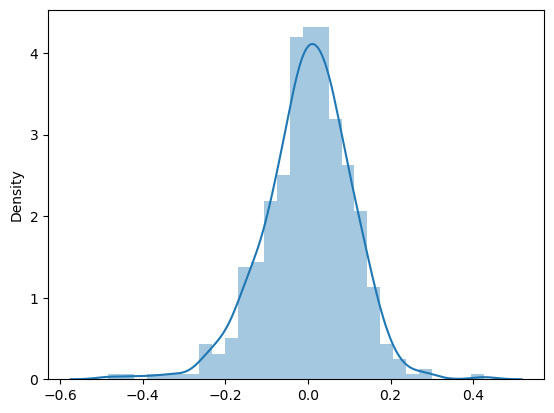

In [221]:
sns.distplot(res)
plt.show()

#### Error terms are following normal distribution

### Multicollinearity

In [223]:
calculateVIF(X_train_new_4)

,Features,VIF
2,windspeed,4.04
1,workingday,3.29
3,spring,2.65
4,summer,2.00
0,yr,1.88
5,winter,1.73
6,Jan,1.60
10,Misty,1.57
8,Sun,1.56
7,Sep,1.18


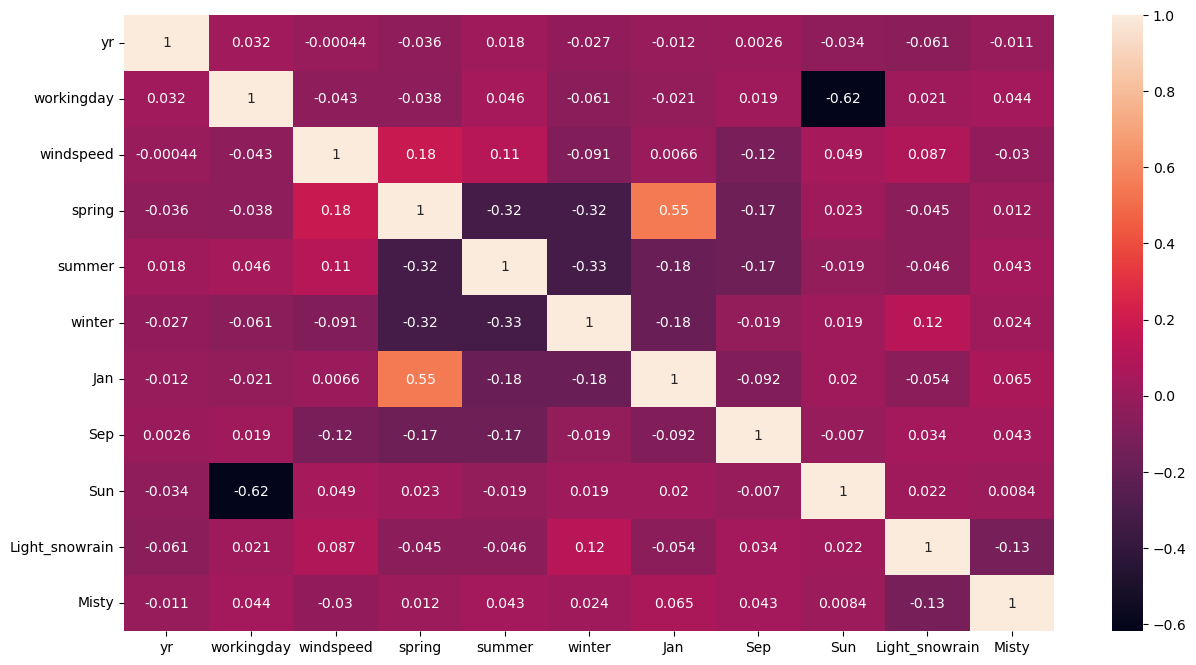

In [225]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new_4.corr(),annot = True)
plt.show()

## Making predictions

In [226]:
numeric_columns_2 = ['temp', 'atemp', 'hum', 'windspeed','cnt']

In [227]:
df_test[numeric_columns_2] = scaler.transform(df_test[numeric_columns])

In [228]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_snowrain,Misty
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,1,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,0,0,0,0,0


In [229]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_snowrain,Misty
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.086364,0.145455,0.177273,0.118182,0.100000,0.127273,0.168182,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.281541,0.353363,0.382770,0.323559,0.300684,0.334038,0.374881,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [230]:
y_test = df_test.pop('cnt')
X_test = df_test

In [231]:
X_test = X_test[X_train_new_4.columns]

In [232]:
X_test_sm = sm.add_constant(X_test)

In [233]:
y_pred = lr_model.predict(X_test_sm)

In [234]:
r2 = r2_score(y_true=y_test,y_pred=y_pred)

In [235]:
r2

0.741735144131702

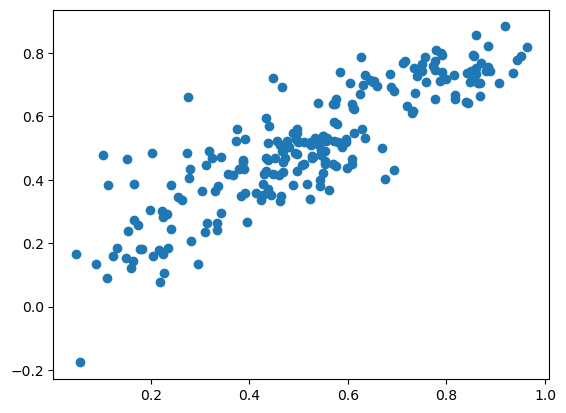

In [236]:
plt.scatter(y_test, y_pred)


In [238]:
round(lr_model.params,4)

const             0.5332
yr                0.2480
workingday        0.0564
windspeed        -0.1887
spring           -0.2581
summer           -0.0394
winter           -0.0743
Jan              -0.1033
Sep               0.0715
Sun               0.0648
Light_snowrain   -0.3023
Misty            -0.0874
dtype: float64

#### Equation for bes fitted line:
cnt = 0.5332+0.2480*year+0.0564*workingday-0.1887*windspeed-0.2581*spring-0.0394*summer-0.0743*winter-0.1033*Jan+0.0715*Sep+0.0648*Sun-0.3023*Light_snowrain-0.0874*Misty

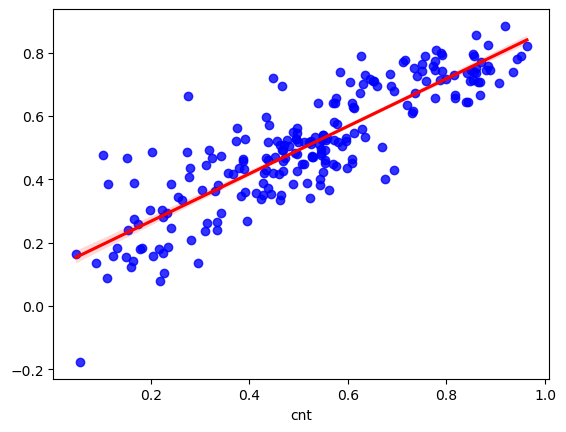

In [240]:
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.show()

The demand of the bikes depends on the following factors:

*  Year
*  Working day
*  Windspeed
*  Spring
*  Summer
*  Winter
*  Jan
*  Sep
*  Sun
*  Light snow rain
*  Misty weather